In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import plotly.express as px

In [6]:
#df1 = pd.read_csv('airbnb_ratings_new.csv', encoding="CP866",low_memory=False)
df2 = pd.read_csv('LA_Listings.csv',  encoding="CP866")
#df3 = pd.read_csv('NY_Listings.csv',  encoding="CP866")

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (7,12,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59865 entries, 0 to 59864
Data columns (total 35 columns):
Listing ID                     59865 non-null int64
Name                           59859 non-null object
Host ID                        59865 non-null int64
Host Name                      59846 non-null object
Host Response Rate             25624 non-null float64
Host Is Superhost              59865 non-null bool
Host total listings count      59851 non-null float64
Street                         31148 non-null object
City                           59865 non-null object
Neighbourhood cleansed         59865 non-null object
State                          59865 non-null object
Country                        59865 non-null object
latitude                       59865 non-null object
longitude                      59865 non-null float64
Property type                  59865 non-null object
Room type                      59865 non-null object
Accommodates                   31148 non-nul

In [221]:
colums_num = ['Host Is Superhost', 'Host total listings count', 'Price', 'Minimum nights', 
              'Maximum nights', 'Availability 365', 'Accommodates', 'Bathrooms', 'Bedrooms', 
              'Number of reviews', 'Review Scores Rating', 'Review Scores Accuracy',
              'Review Scores Value', 'Reviews per month']
df2.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month'],
      dtype='object')

### Исследование структуры признаков

In [1]:
df2['Host Response Rate'].isnull().sum()/(df2.shape[0])

NameError: name 'df2' is not defined

Имеем 50% пропущенных значений!!!. Вывод: данный признак плохо подходит для оценки.

In [224]:
df2_group = df2.groupby('Host ID')[colums_num].mean()
df2_group.isnull().sum()/(df2_group.shape[0])

Host Is Superhost            0.000000
Host total listings count    0.000402
Price                        0.000000
Minimum nights               0.000000
Maximum nights               0.404797
Availability 365             0.000000
Accommodates                 0.404797
Bathrooms                    0.405772
Bedrooms                     0.404797
Number of reviews            0.000000
Review Scores Rating         0.000000
Review Scores Accuracy       0.000000
Review Scores Value          0.000000
Reviews per month            0.000000
dtype: float64

In [230]:
df2['Host total listings count'].mean()

7.76277756428464

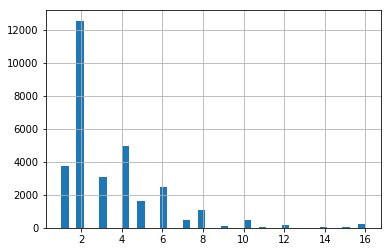

In [306]:
df2['Accommodates'].dropna().hist(bins=40)

In [307]:
df2['Availability 365'].mean()

185.10511985300258

Пропущенные значения можно заполнить средним или наиболее встречающимся значением

%0 for eview Scores Rating 0.6059968261922659
%0 Number of reviews 0.23105320304017374


21.160143656560596

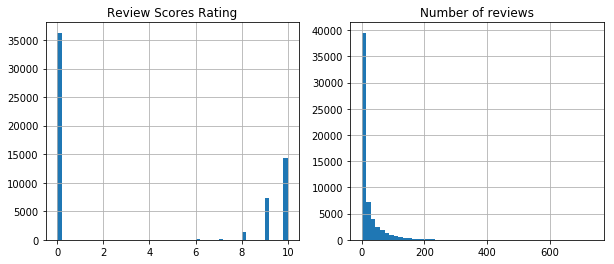

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

df2['Review Scores Value'].hist(bins=50, ax=axes[0])
axes[0].set_title('Review Scores Rating')
df2['Number of reviews'].hist(bins=50, ax=axes[1]) 
axes[1].set_title('Number of reviews')

print('%0 for Review Scores Rating',(df2['Review Scores Value']==0).sum()/df2.shape[0])
print('%0 Number of reviews', (df2['Number of reviews']==0).sum()/df2.shape[0])
df2['Number of reviews'].mean()

Что делать с теми хостами, которые имеют  0 отзывов? Как вариант добавить их в отдельную группу.

При этом есть хосты, которые имеют 0 рейтинг при ненулевом количестве отзывов.

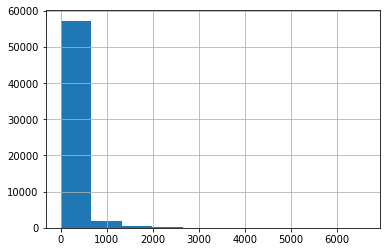

In [242]:
(df2['Review Scores Value']*df2['Number of reviews']).hist()

In [305]:
fig = px.scatter_mapbox(lat=pd.to_numeric(df2['latitude']), lon=df2["longitude"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Тестовые модели

In [120]:
features1 = ['Host Is Superhost', 'Host total listings count', 'Price', 
             'Number of reviews','Review Scores Rating', 'Reviews per month']
test_data_1 = df2[features1].dropna()

In [93]:
%%time
ssd = []
range_n_clusters = [6,7,8,9,10, 11, 12, 13, 14, 15, 16]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(test_data_1)
    
    ssd.append(kmeans.inertia_)

Wall time: 20.9 s


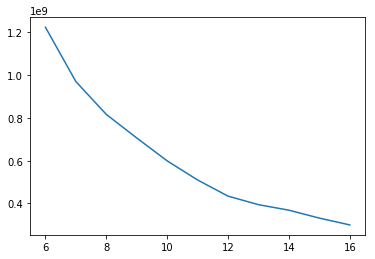

In [94]:
plt.plot(range_n_clusters, ssd)

Wall time: 16.8 s


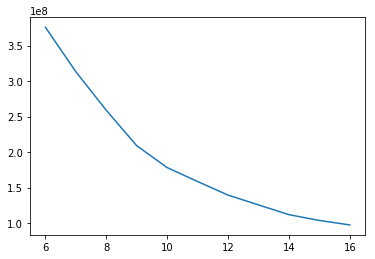

In [205]:
%%time
ssd = []
range_n_clusters = [6,7,8,9,10, 11, 12, 13, 14, 15, 16]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(test_data_2)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(range_n_clusters, ssd)

In [121]:
kmeans =  KMeans(n_clusters=10, max_iter=500)
kmeans.fit(test_data_1)
test_data_1['label'] = kmeans.fit_predict(test_data_1)
labels = test_data_1['label']

In [122]:
test_data_1.head()

Host Is Superhost  Host total listings count  Price  Number of reviews  \
0              False                        3.0     80                  0   
1               True                        9.0     75                 38   
2              False                        1.0     45                  0   
3              False                        2.0     35                  0   
4              False                        1.0     53                  1   

   Review Scores Rating  Reviews per month  label  
0                     0               0.00      0  
1                    95               1.11      8  
2                     0               0.00      0  
3                     0               0.00      0  
4                   100               0.11      8

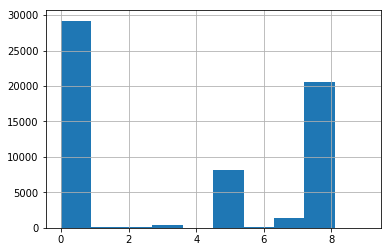

In [123]:
labels.hist()

In [139]:
test_data_1[test_data_1['label']==8].head()
test_data_1.groupby('label')['Host Is Superhost'].sum()

label
0     223.0
1       0.0
2       0.0
3       0.0
4       0.0
5     802.0
6       0.0
7      73.0
8    5242.0
9       0.0
Name: Host Is Superhost, dtype: float64

In [155]:
df_test = test_data_1.loc[(test_data_1['label']==0)  & (test_data_1['Host Is Superhost']==1)]

In [165]:
df_test[df_test['Number of reviews'] != 0]

Host Is Superhost  Host total listings count  Price  Number of reviews  \
1871                True                        2.0     50                 28   
6522                True                        5.0      0                  1   
7421                True                       36.0      0                  1   
7989                True                        2.0     45                  1   
10770               True                        3.0     40                 32   
22855               True                        1.0    190                  8   
23837               True                       21.0    140                  8   
25004               True                        3.0      0                  1   

       Review Scores Rating  Reviews per month  label  
1871                      0               0.00      0  
6522                     40               0.08      0  
7421                     40               0.11      0  
7989                     20               0.16      0  
10770                     0               0.00      0  
22855                     0               0.00      0  
23837                     0               0.00      0  
25004                     0               0.03      0

Как видно "нулёвщики" по отзывам и рейтингу группируются в отдельные кластеры.

Как я считаю, хостов с нулевыми показателями количества отзывов стоит сразу отсеивать в отдельную группу как тёмных лошадок.

In [201]:
test_data_2 = df2.groupby('Host ID')[features1].mean()
test_data_2.dropna(inplace=True)

In [202]:
kmeans2 =  KMeans(n_clusters=10, max_iter=500)
kmeans2.fit(test_data_2)
test_data_2['label'] = kmeans2.fit_predict(test_data_2)
labels = test_data_2['label']

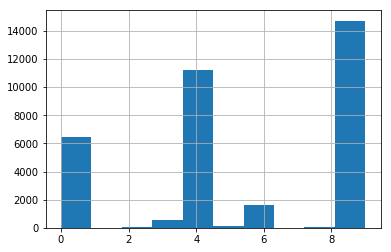

In [203]:
labels.hist()

In [204]:
test_data_2.groupby('label')['Host Is Superhost'].sum()

label
0     603.794003
1       0.000000
2       0.000000
3      24.753846
4    2819.278868
5       0.777778
6     144.037674
7       0.000000
8       0.647059
9      82.932002
Name: Host Is Superhost, dtype: float64

In [ ]:
te[test_data_2['label']==4]

In [41]:
columns_cat = ['Name','Street', 'City', 'Neighbourhood cleansed', 
                     'Property type', 'Room type', 'Amenities', 'Calendar last scraped', 
                      'Last Review Date']

colums_num = ['Host Is Superhost ', 'Host total listings count',  'Price', 'Minimum nights', 'Maximum nights',
     'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Value', 'Reviews per month']

data_num = df2[colums_num]
data_num.head()

Host Response Rate  Host total listings count  Accommodates  Price  \
0                 NaN                        3.0           3.0     80   
1                 1.0                        9.0           3.0     75   
2                 1.0                        1.0           1.0     45   
3                 1.0                        2.0           1.0     35   
4                 0.0                        1.0           4.0     53   

   Minimum nights  Maximum nights  Review Scores Rating  \
0               1          1125.0                     0   
1               3          1125.0                    95   
2               1          1125.0                     0   
3               3          1125.0                     0   
4               1          1125.0                   100   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                       0                          0                      0   
1                      10                          9                      9   
2                       0                          0                      0   
3                       0                          0                      0   
4                      10                         10                     10   

   Review Scores Value  Reviews per month  
0                    0               0.00  
1                    9               1.11  
2                    0               0.00  
3                    0               0.00  
4                   10               0.11

In [13]:
review = ['Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month']

data1 = df2[review]

Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                     0                       0                          0   
1                    95                      10                          9   
2                     0                       0                          0   
3                     0                       0                          0   
4                   100                      10                         10   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                      0                            0                       0   
1                      9                           10                      10   
2                      0                            0                       0   
3                      0                            0                       0   
4                     10                           10                      10   

   Review Scores Value  Reviews per month  
0                    0               0.00  
1                    9               1.11  
2                    0               0.00  
3                    0               0.00  
4                   10               0.11

Wall time: 32.7 s


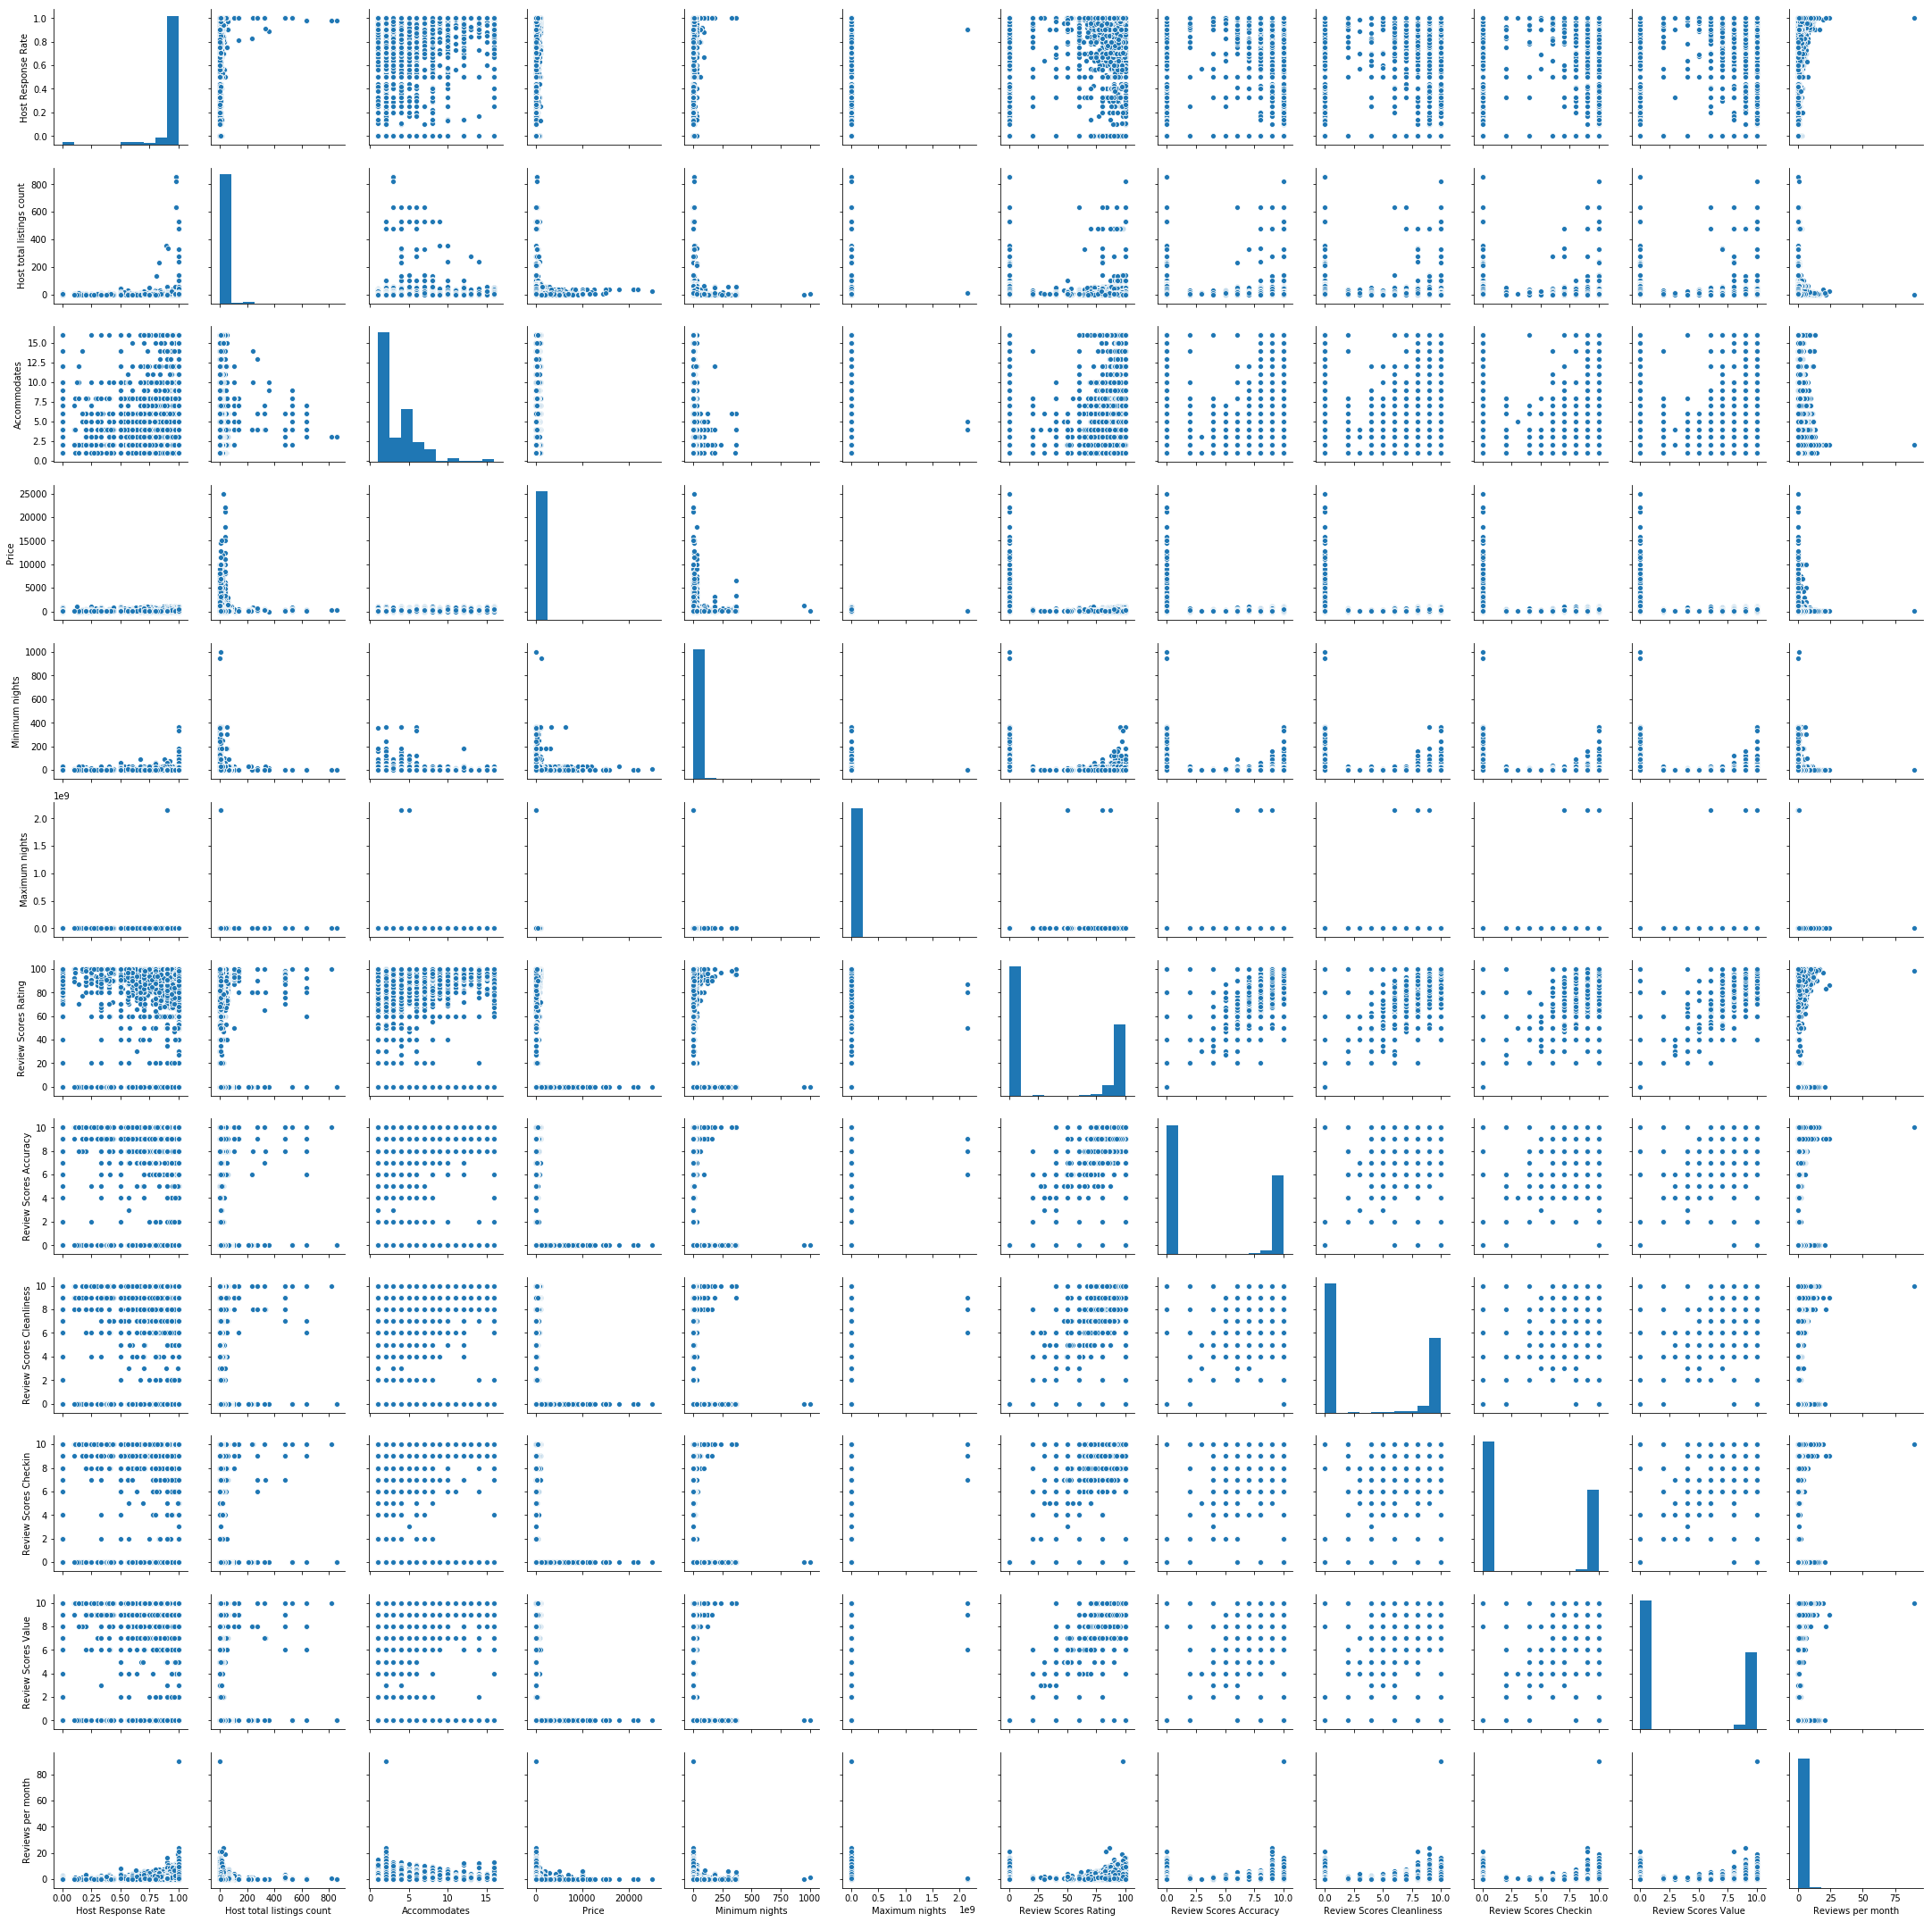

In [42]:
%%time 
sns.pairplot(data_num)

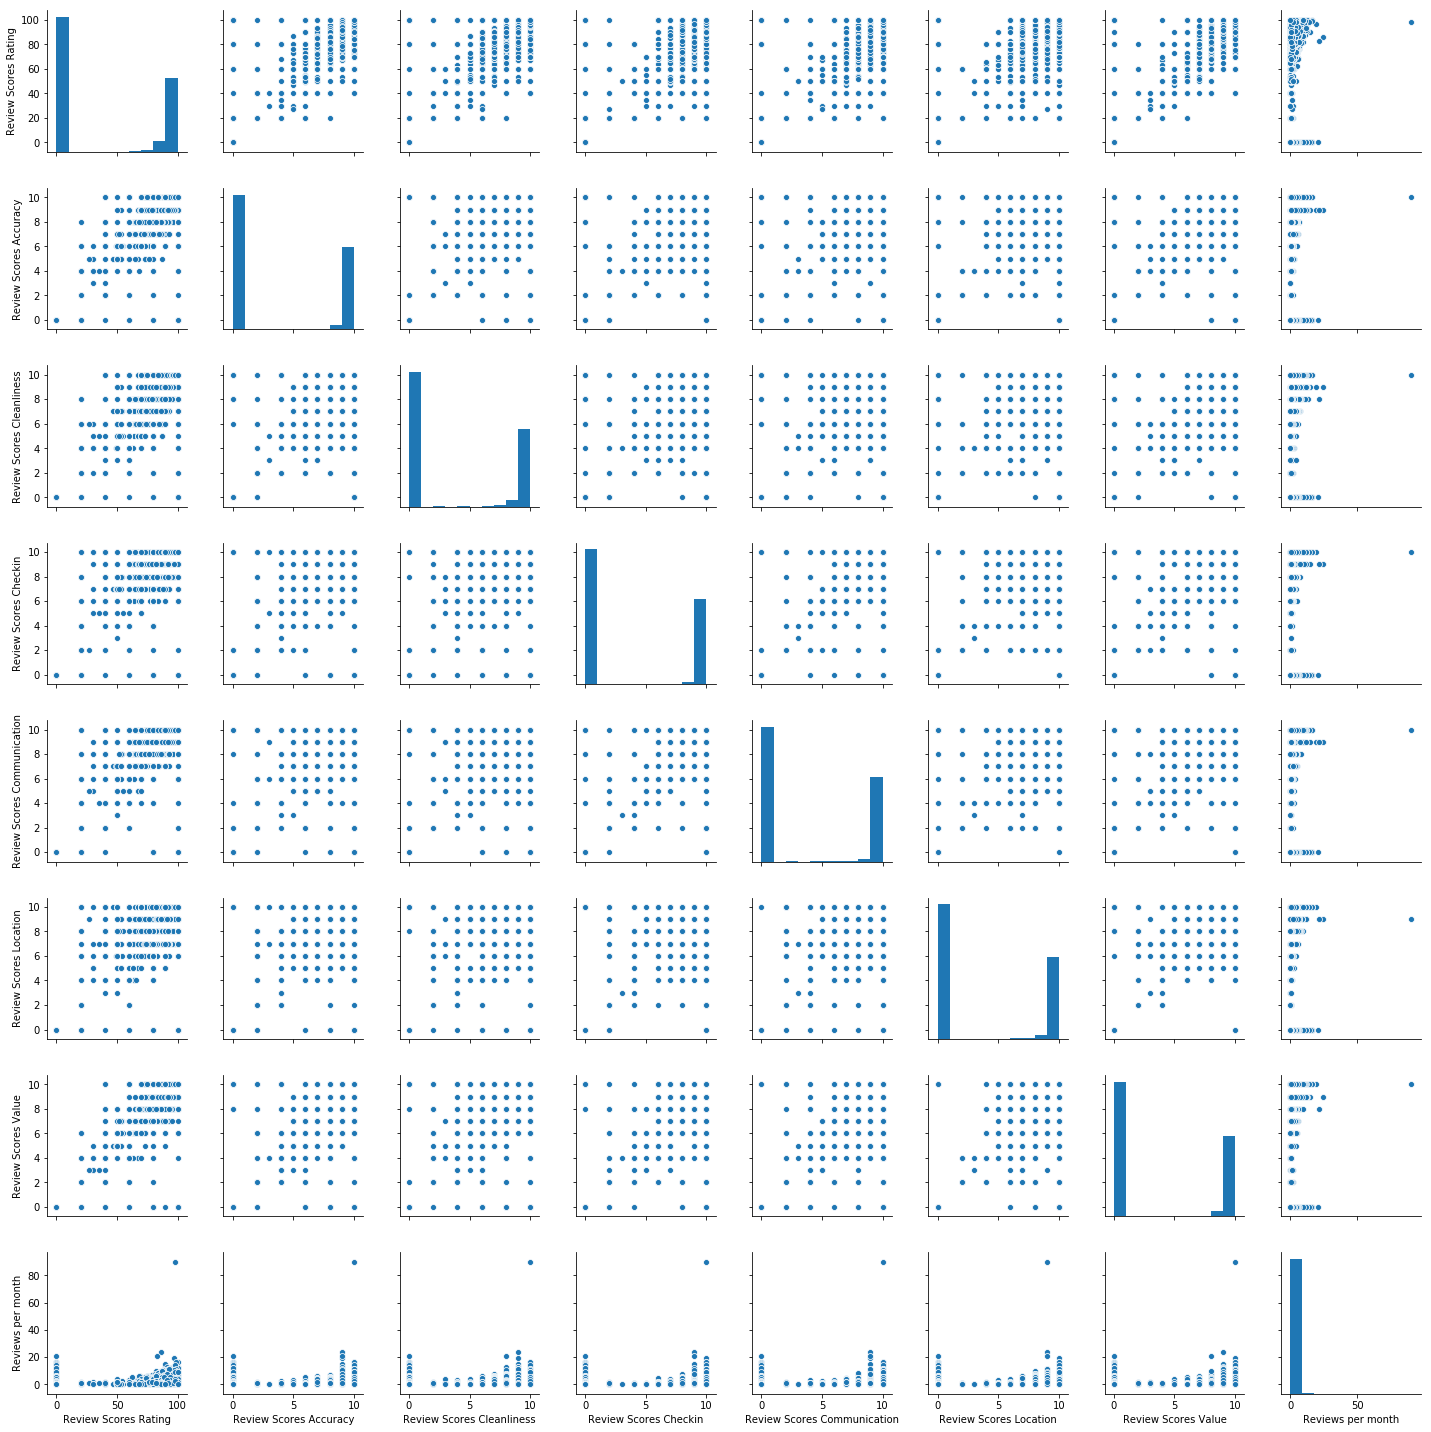

In [14]:
sns.pairplot(data1)

In [240]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '.mapbox_token'